In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join("..", "..")))  # Subir dos niveles le da otra ruta para importar lo depackages 
import packages.Preprocesamiento as ppr
import pandas as pd
import datetime as dt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
path_datos = os.path.join('..','..','Datos','Limpios')
filename = os.path.join(path_datos,'datos1_limpios.csv')
df = pd.read_csv(filename, index_col= 0)
df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49


In [8]:
path_datos = os.path.join('..','..','Datos','Limpios')
filename = os.path.join(path_datos,'datos2_limpios.csv')
df2 = pd.read_csv(filename, index_col= 0)
df2.head()

,Edad,Ingreso Anual (€),Porcentaje Ahorro (%),Ahorro Actual (€),Gasto Mensual (€),Vida Esperada (años),Edad de Jubilación,Años Hasta Jubilación
0,32,29353.06,7.26,25554.94,2268.62,81.29,67,35
1,51,39218.38,23.72,288438.59,2492.83,75.00,67,16
2,32,15000.00,11.14,20055.00,1110.73,78.70,65,33
3,30,23517.91,25.01,58819.72,1469.66,75.00,67,37
4,60,20867.64,23.96,200005.33,1322.29,81.47,62,2


<Axes: >

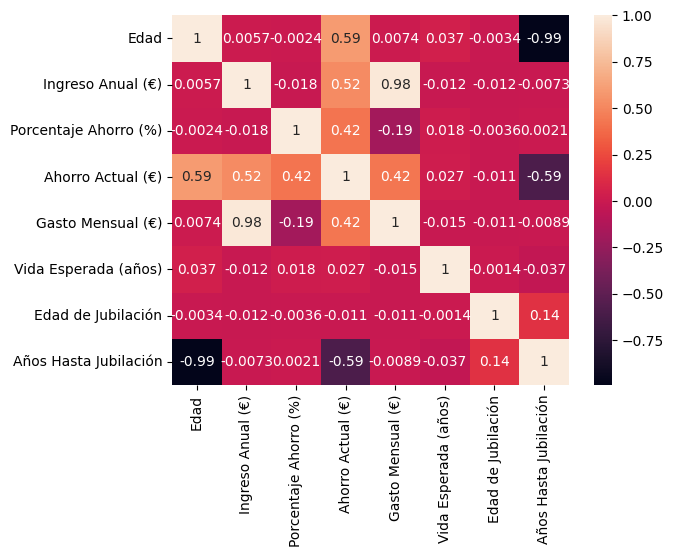

In [10]:
sns.heatmap(df2.corr(), annot=True)